In [13]:
import matplotlib.pyplot as plt
#Plotting all the values.
def plot_samples(X,Y):
    x = [item[0] for item in X] 
    y = [item[1] for item in X] 
    s_plot = plt.scatter(x,y, c = Y)
    #plt.legend(handles = s_plot.legend_elements()[0], labels = set(Y))
    plt.gca().set_xlabel('x', fontsize = 15)
    plt.gca().set_ylabel('y', fontsize = 15)
    plt.show()

In [21]:
import numpy as np
from tabulate import tabulate
np.random.seed(0)

#KNearestNeighbors Algorithm.
class myknnclassify():   
    def __init__(self, X, y, no_of_neighbors=5,no_of_classes = 2, weights='uniform'):

        self.X = X
        self.y = y
        self.no_of_neighbors = no_of_neighbors
        self.weights = weights
        self.no_of_classes = no_of_classes

        #Calculates eucledian distance
    def euclidian_distance(self, a, b):
        dist = 0.0
        for i in range(0,len(a)):
            dist += (a[i] - b[i])**2
        return math.sqrt(dist)

    def kneighbors(self, X_test, dist_return=False):
        neighbour_gen = []
        distance = []        
        dist_between_points = [self.euclidian_distance(x_test, self.X) for x_test in X_test]
        for i in dist_between_points:
            enum = enumerate(i)
            sorted_neigh = sorted(enum, key=lambda x: x[1])[:self.no_of_neighbors]
            sorted_0 = [tup[0] for tup in sorted_neigh]
            sorted_1 = [tup[1] for tup in sorted_neigh]
            #print([tup[1] for tup in sorted_neigh])
            distance.append(sorted_1)
            neighbour_gen.append(sorted_0)
        if dist_return = True:
            return np.array(distance), np.array(neighbour_gen)
        return np.array(neighbour_gen)

    #predict function
    def predict(self, X_test):
        neighbors = self.kneighbors(X_test)
        y_pred = np.array([np.argmax(np.bincount(self.y[neighbor]))for neighbor in neighbors])
        return y_pred
    
    #function to calculate accuracy
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        score = float(sum(y_pred == y_test)) / float(len(y_test))
        return score,y_pred

In [22]:
#Dataset generation.
def generateDataset_knn(mean,cov,N):
    #mean = [m1,m2]
    #cov = [cov1,cov2]
    X = []
    y = []
    for _class_label in range(0, len(mean)):
        m = mean[_class_label]
        _cov = cov[_class_label]
        samples = np.random.multivariate_normal(mean=m, cov=_cov, size=N)
        if len(X) == 0:
            X = samples
            y = [_class_label]*N
        else:
            X = np.concatenate((X, samples))
            y = np.concatenate((y, [_class_label]*N))
    return X,y

C:\Users\Sampada\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


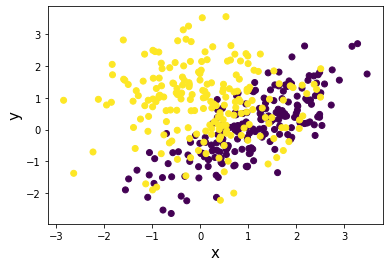

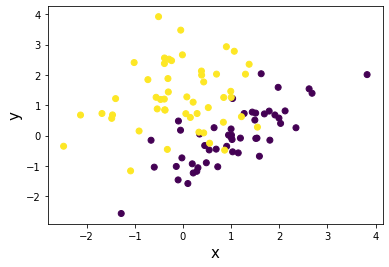

╒═════╤════════════╕
│   k │   accuracy │
╞═════╪════════════╡
│   1 │       0.87 │
├─────┼────────────┤
│   2 │       0.86 │
├─────┼────────────┤
│   3 │       0.86 │
├─────┼────────────┤
│   4 │       0.89 │
├─────┼────────────┤
│   5 │       0.88 │
├─────┼────────────┤
│  10 │       0.87 │
├─────┼────────────┤
│  20 │       0.88 │
╘═════╧════════════╛


In [23]:
#Dataset Generation continued.
m1 = np.array([1,0])
cov1 = np.array([[1, 0.75],
                [0.75, 1]])

m2 = np.array([0,1])
cov2 = np.array([[1, -0.5],
                [0.5, 1]])
X, y = generateDataset_knn(mean=[m1,m2], cov=[cov1,cov2], N=200)
X_test, y_test = generateDataset_knn(mean=[m1,m2], cov=[cov1,cov2], N=50)
plot_samples(X, y)
plot_samples(X_test, y_test)

#Classification
k = [1, 2, 3, 4, 5, 10, 20]
accu = []
for no_of_neighbors in k:
    our_classifier = myknnclassify(X, y, no_of_neighbors=no_of_neighbors,no_of_classes=2)
    score,_ = our_classifier.score(X_test, y_test)
    accu.append(score)
table = tabulate(zip(k,accu),['k','accuracy'] , tablefmt="fancy_grid")
print(table) 

In [27]:
import numpy as np
from tabulate import tabulate
import math

#Regression
class myknnregress():
    def __init__(self, X, y, no_of_neighbors=6,no_of_classes = 3, weights='uniform'):

        self.X = X
        self.y = y
        self.no_of_neighbors = no_of_neighbors
        self.weights = weights
        self.no_of_classes = no_of_classes

    def euclidian_distance(self, a, b):
        dist = 0.0
        for i in range(0,len(a)):
            dist += (a[i] - b[i])**2
        return math.sqrt(dist)

    def kneighbors(self, X_test, dist_return=False):
        neighbour_gen = []
        distance = []        
        dist_between_points = [self.euclidian_distance(x_test, self.X) for x_test in X_test]
        for i in dist_between_points:
            enum = enumerate(i)
            sorted_neigh = sorted(enum, key=lambda x: x[1])[:self.no_of_neighbors]
            sorted_0 = [tup[0] for tup in sorted_neigh]
            sorted_1 = [tup[1] for tup in sorted_neigh]
            #print([tup[1] for tup in sorted_neigh])
            distance.append(sorted_1)
            neighbour_gen.append(sorted_0)
        if dist_return = True:
            return np.array(distance), np.array(neighbour_gen)
        return np.array(neighbour_gen)

    def predict(self, X_test):
        neighbors = self.k_neighbors(X_test)
        y_pred = np.array([sum(self.y[neighbor])/no_of_neighbors for neighbor in neighbors])
        return y_pred
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        se = sum(((y_pred - y_test) ** 2))
        mse = (se)/len(y_test)
        rmse = math.sqrt(mse)
        return rmse,y_pred



In [28]:
def generateDataset_reg(mean,cov,N):
    _x = np.random.multivariate_normal(mean=mean, cov=cov, size=N)
    y = []
    for x in _x:
        y.append(2*x[0]+x[1]+np.random.normal(scale=0.5))
    return _x,np.asarray(y)

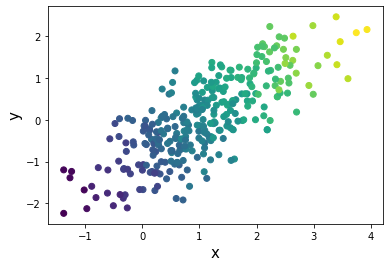

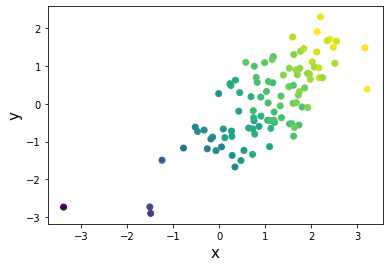

╒═════╤══════════╕
│   k │     RMSE │
╞═════╪══════════╡
│   1 │ 0.890651 │
├─────┼──────────┤
│   2 │ 0.802916 │
├─────┼──────────┤
│   3 │ 0.828072 │
├─────┼──────────┤
│   5 │ 0.795185 │
├─────┼──────────┤
│  10 │ 0.835838 │
├─────┼──────────┤
│  20 │ 0.917248 │
├─────┼──────────┤
│  50 │ 1.15639  │
├─────┼──────────┤
│ 100 │ 1.43865  │
╘═════╧══════════╛


In [29]:
#regression
m1 = np.array([1,0])
cov1 = np.array([[1, 0.75],
                [0.75, 1]])

m2 = np.array([0,1])
cov2 = np.array([[1, -0.5],
                [0.5, 1]])
X, y = generateDataset_reg(mean=m1, cov=cov1, N=300)
X_test, y_test = generateDataset_reg(mean=m1, cov=cov1, N=100)
plot_samples(X, y)
plot_samples(X_test, y_test)

k = [1, 2, 3, 5, 10, 20, 50, 100]
rmse = []
for no_of_neighbors in k:
    our_classifier = myknnregress(X, y, no_of_neighbors=no_of_neighbors,no_of_classes=2)
    _rmse,_ = our_classifier.score(X_test, y_test)
    rmse.append(_rmse)    
table = tabulate(zip(k,rmse),['k','RMSE'] , tablefmt="fancy_grid")
print(table)  